In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

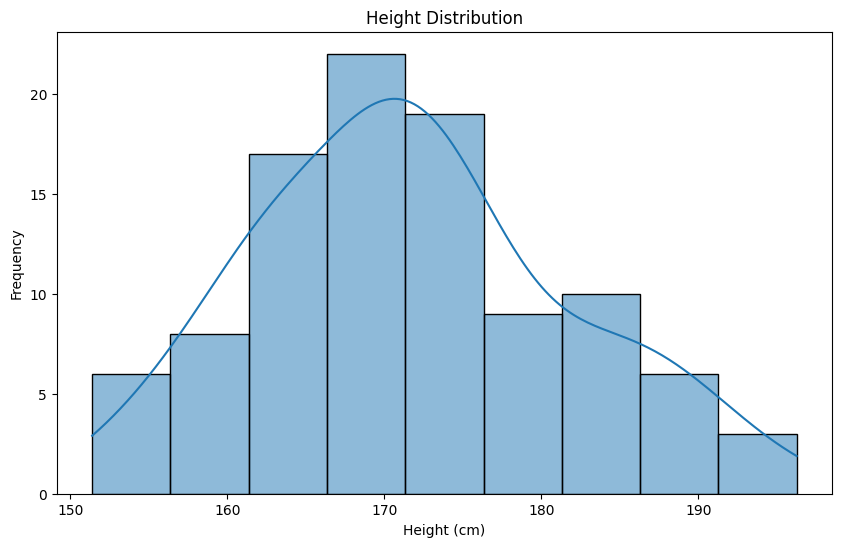

In [2]:
height = np.random.normal(loc=170, scale=10, size=100) # here loc means the mean height, scale means the standard deviation
plt.figure(figsize=(10, 6))
sns.histplot(height, kde=True)
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

In [6]:
# population between -1std to +1std
population = height[(height > (height.mean() - height.std())) & (height < (height.mean() + height.std()))]
population_percentage = (len(population) / len(height)) * 100
population_percentage

67.0

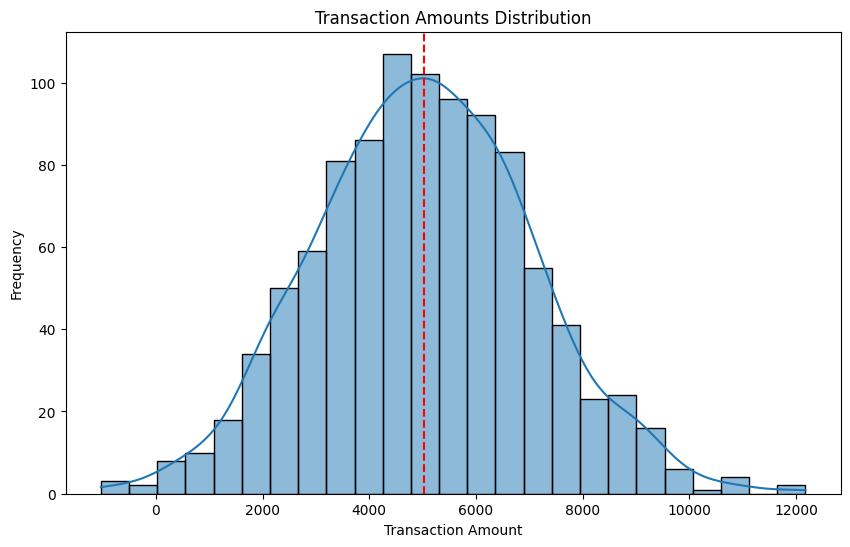

In [8]:
# lets use it top detect outliers

tx_data = np.random.normal(loc=5000, scale=2000, size=1000)
# add some outliers
tx_data = np.concatenate([tx_data, np.array([10000, 11000, 12000])])
mean = tx_data.mean()
plt.figure(figsize=(10, 6))
sns.histplot(tx_data, kde=True)
plt.axvline(mean, color='r', linestyle='--')
plt.title("Transaction Amounts Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


In [9]:
# anything more then 3 standard deviations from the mean
outliers = tx_data[(tx_data < (mean - 3 * tx_data.std())) | (tx_data > (mean + 3 * tx_data.std()))]
outliers


array([12173.49609461, 12000.        ])

In [10]:
# https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/empirical-rule/
# The empirical rule states that for a normal distribution:
# - Approximately 68% of the data falls within one standard deviation of the mean.
# - Approximately 95% falls within two standard deviations.
# - Approximately 99.7% falls within three standard deviations.

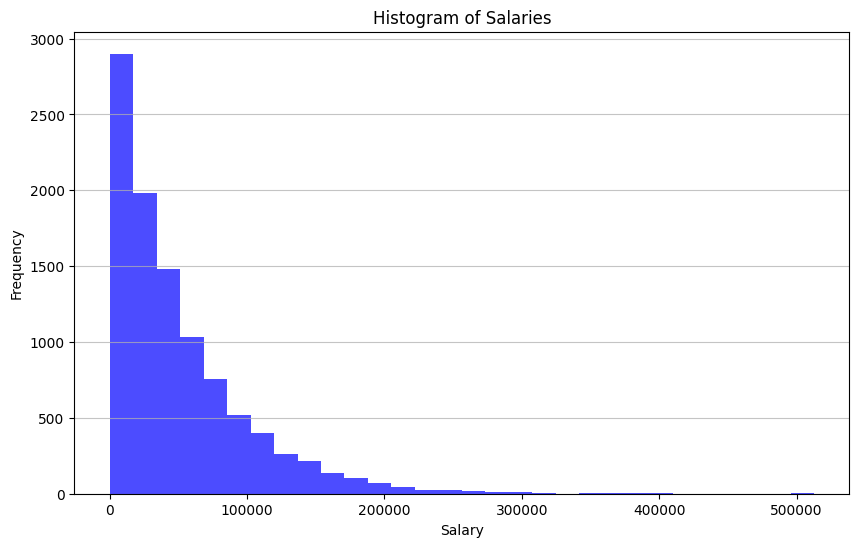

In [15]:
# sampling distribution
import numpy as np
import matplotlib.pyplot as plt
salary = np.random.exponential(scale=50000, size=10000)
plt.figure(figsize=(10, 6))
plt.hist(salary, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
population_mean = np.mean(salary)
population_mean


np.float64(50471.42346133268)

sample means: 50485.419487907326
population mean: 50471.42346133268
std of sample means: 9285.555005378485
std of population: 49929.706952757806
difference: 13.996026574648567


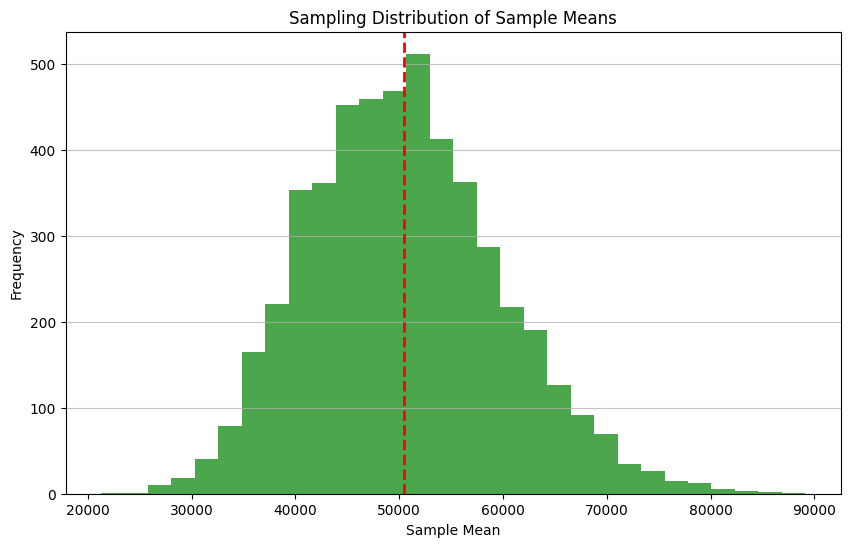

In [21]:
# sampling distribution
# samples = [np.random.choice(salary, size=30, replace=False) for _ in range(5000)]
samples = []
for _ in range(5000):
    sample = np.random.choice(salary, size=30, replace=False)
    samples.append(sample)

# compute mean of each sample
# sample_means = [np.mean(sample) for sample in samples]
sample_means = []

for sample in samples:
    sample_means.append(np.mean(sample))

print('sample means:', np.mean(sample_means))
print('population mean:', population_mean)
print('std of sample means:', np.std(sample_means))
print('std of population:', np.std(salary))
print('difference:', np.mean(sample_means) - population_mean)
# plot the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, alpha=0.7, color='green')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2)
plt.title('Sampling Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


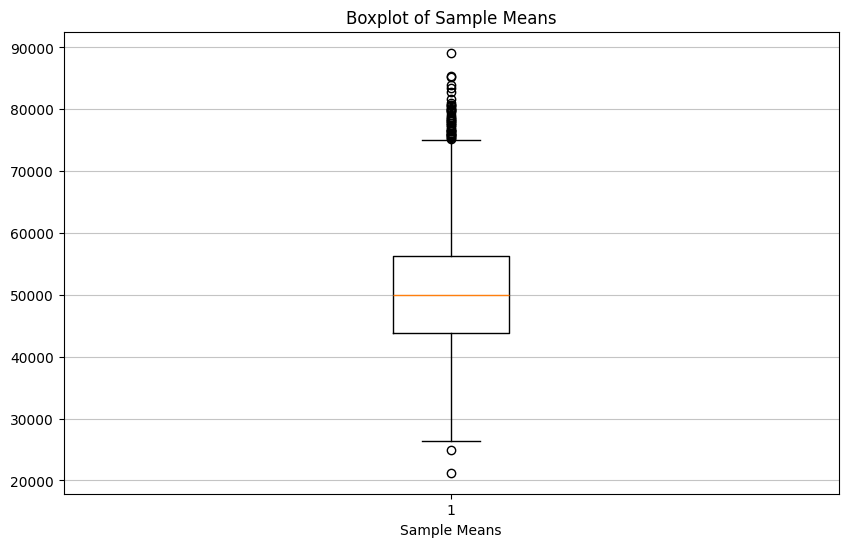

In [24]:
# boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(sample_means)
plt.title('Boxplot of Sample Means')
plt.xlabel('Sample Means')
plt.grid(axis='y', alpha=0.75)
plt.show()

# violin plot
# plt.figure(figsize=(10, 6))
# plt.violinplot(sample_means)
# plt.title('Violin Plot of Sample Means')
# plt.xlabel('Sample Means')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

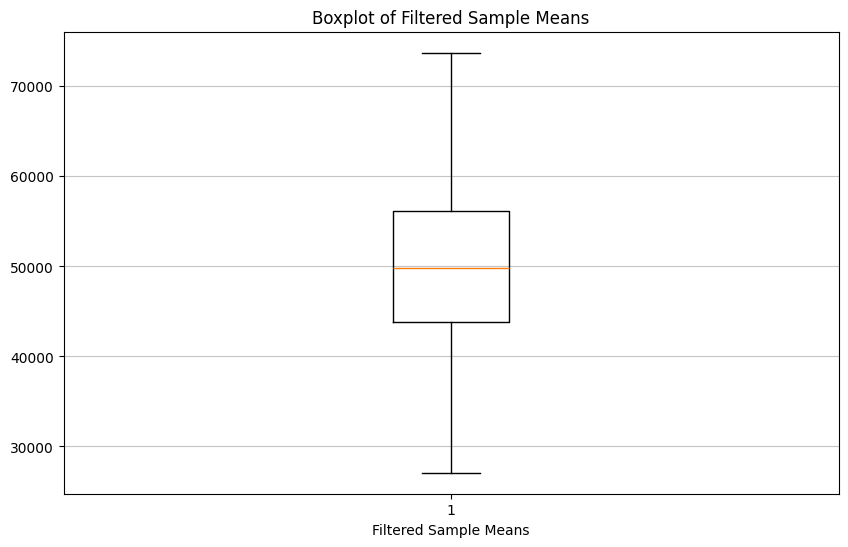

In [28]:
#using the boxplot : we can remove outliers from data
Q1 = np.percentile(sample_means, 25)
Q3 = np.percentile(sample_means, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.4 * IQR
filtered_data = [x for x in sample_means if lower_bound < x < upper_bound]

# replot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data)
plt.title('Boxplot of Filtered Sample Means')
plt.xlabel('Filtered Sample Means')
plt.grid(axis='y', alpha=0.75)
plt.show()


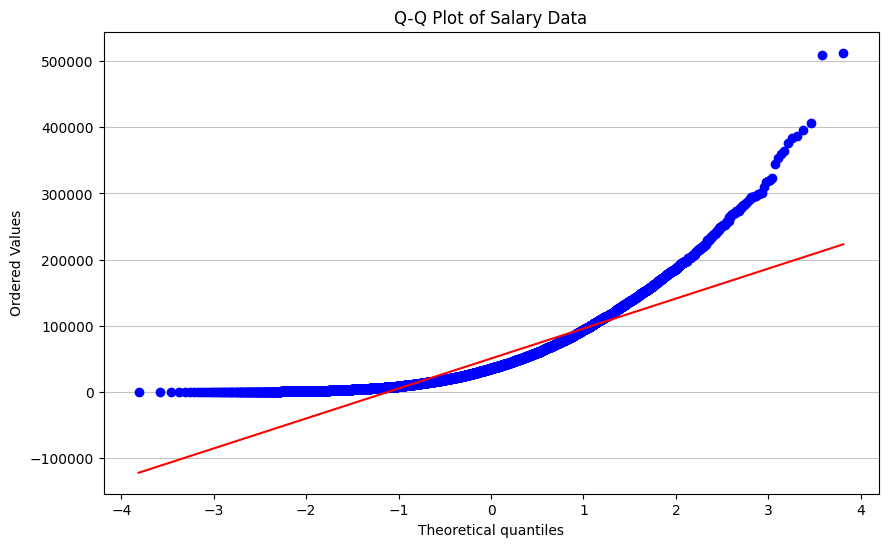

In [31]:
# Q- Q plot
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(salary, dist="norm", plot=plt)
plt.title('Q-Q Plot of Salary Data')
plt.grid(axis='y', alpha=0.75)
plt.show()


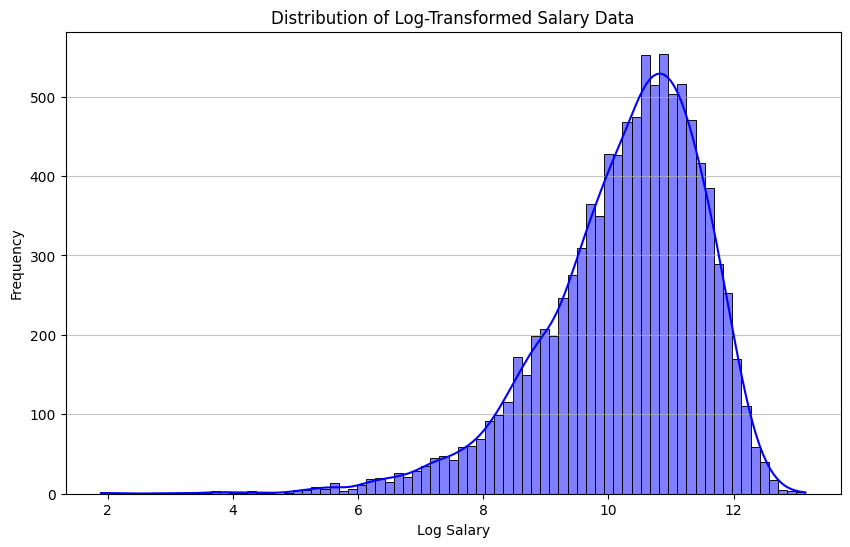

Fitted lambda for Box-Cox transformation: 0.26684948246634


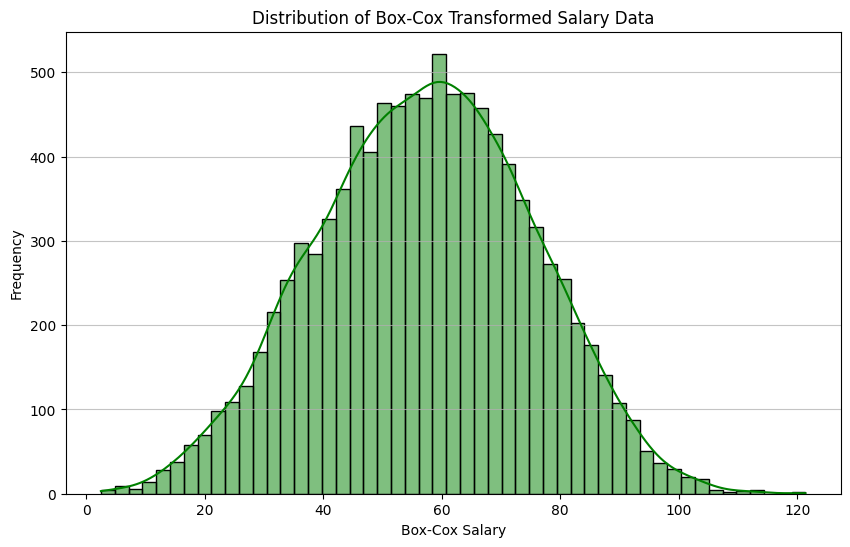

In [34]:
import seaborn as sns
log_salary = np.log(salary)
plt.figure(figsize=(10, 6))
sns.histplot(log_salary, kde=True, color='blue')
plt.title('Distribution of Log-Transformed Salary Data')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



# lets use te box-cox from scipy
from scipy import stats
boxcox_salary, fitted_lambda = stats.boxcox(salary)
print('Fitted lambda for Box-Cox transformation:', fitted_lambda)
plt.figure(figsize=(10, 6))
sns.histplot(boxcox_salary, kde=True, color='green')
plt.title('Distribution of Box-Cox Transformed Salary Data')
plt.xlabel('Box-Cox Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
